## 第一章
主要用于部分图表的生成，学习matplotlib  
使用python3

### 图表的生成和保存

In [111]:
# 常用包
import numpy as np
import os

# 设定种子，使得产生可控的随机数
np.random.seed(42)

In [112]:
# 画图导入包
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt

In [113]:
# 设置图片参数
plt.rcParams['axes.labelsize'] = 14 # 坐标轴的文字大小
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12
# plt.rcParams.keys

In [114]:
# 图片保存目录
PROJECT_ROOT_DIR = '..'
CHAPTER_ID = 'fundamentals'

In [115]:
def save_fig(fig_id, tight_layout=True): # tight_layout 控制子图间隔
    path = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID, fig_id + '.png')
    print("Saveing figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)



In [116]:
# 忽略不必要的警告
import warnings

warnings.filterwarnings(action='ignore', module='scipy', message='^interal gelsd')

### 示例1-1

In [117]:
# 人均GDP的幸福度之间的关系
def prepare_country_stats(oecd_bli, gdp_per_capita):
    
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [118]:
# 数据路径
import os
datapath = os.path.join('datasets', 'lifesat', '')

In [119]:
# 代码示例
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model


In [120]:
# 加载数据
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")


In [121]:
# 准备数据
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [122]:
X = np.c_[country_stats['GDP per capita']]

In [123]:
Y = np.c_[country_stats['Life satisfaction']]

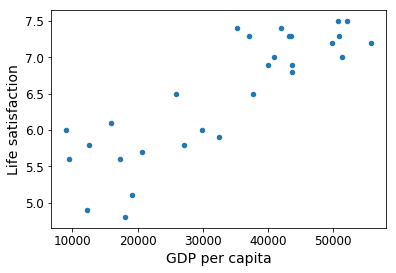

In [124]:
# 可视化数据
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [125]:
# 选择一个模型
model = sklearn.linear_model.LinearRegression()
# 训练数据
model.fit(X, Y)
# 进行预测
X_new = [[22578]]
print(model.predict(X_new))

[[ 5.96198134]]


### 书中的部分图片

 加载和准备数据

In [126]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [127]:
oecd_bli["Life satisfaction"].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

In [128]:
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [129]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
full_country_stats

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


In [130]:
full_country_stats[["GDP per capita", 'Life satisfaction']].loc["United States"]

GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [131]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

# iloc : index loc,根据index来找数据
sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

In [132]:
sample_data

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


Saveing figure money_happy_scatterplot


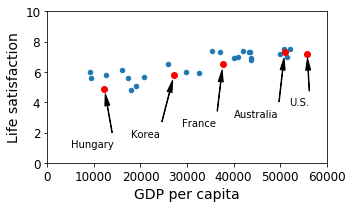

In [133]:
sample_data.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(5, 3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8)
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text, 
                arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
save_fig("money_happy_scatterplot")
plt.show()

In [134]:
sample_data.to_csv(os.path.join("datasets", "lifesat", "lifesat.csv"))

In [135]:
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


Saveing figure tweaking_model_params_plot


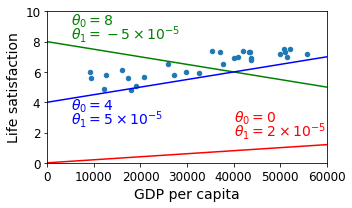

In [136]:
import numpy as np

sample_data.plot(kind="scatter", x="GDP per capita", y="Life satisfaction", figsize=(5, 3))
plt.axis([0, 60000, 0, 10])
X = np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, 'r')
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color='r')
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color='r')

plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")

plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")
save_fig('tweaking_model_params_plot')

plt.show()

In [137]:
from sklearn import linear_model

lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
Ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, Ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(4.8530528002664362, 4.9115445891584831e-05)

Saveing figure best_fit_model_plot


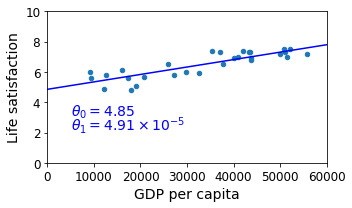

In [138]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
save_fig('best_fit_model_plot')
plt.show()

In [139]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]

In [140]:
cyprus_gdp_per_capita

22587.490000000002

In [141]:
cyprus_predicted_life_satisfaction = lin1.predict(cyprus_gdp_per_capita)[0][0]
cyprus_predicted_life_satisfaction

5.9624474431881502

Saveing figure cyprus_predicted_plot


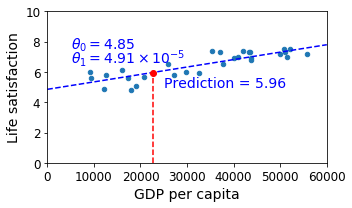

In [142]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b--")
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")

plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita],
         [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, 'ro')
save_fig('cyprus_predicted_plot')
plt.show()

In [143]:
sample_data[7:10]

,GDP per capita,Life satisfaction
Country,,
Portugal,19121.592,5.1
Slovenia,20732.482,5.7
Spain,25864.721,6.5


In [144]:
(5.1 + 5.7 + 6.5) / 3

5.766666666666667

In [145]:
backup = oecd_bli, gdp_per_capita

In [146]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [147]:
# 全部代码
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

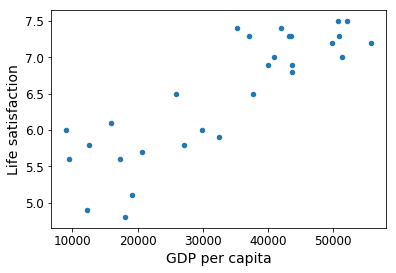

[[ 5.96242338]]


In [148]:
# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

In [149]:
oecd_bli, gdp_per_capita = backup

In [150]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [151]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

Saveing figure representative_training_data_scatterplot


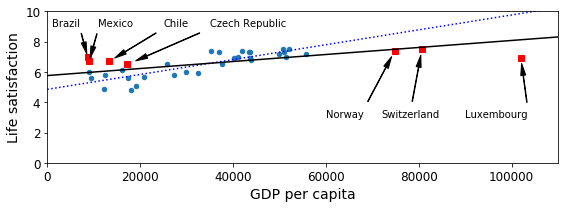

In [152]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")
    
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1 * X, "b:")

lin_reg_full = linear_model.LinearRegression()
lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")

save_fig('representative_training_data_scatterplot')

plt.show()

/Applications/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:116: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Saveing figure overfitting_model_plot


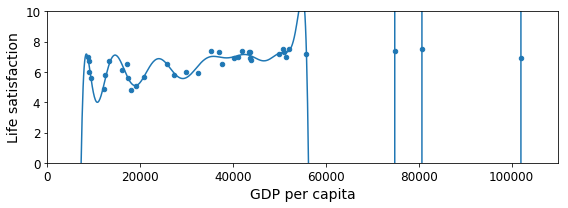

In [153]:
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline

# 多项式回归，过拟合
poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([("poly", poly), ("scal", scaler), ("lin", lin_reg2)])

pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])

plt.plot(X, curve)
save_fig('overfitting_model_plot')

plt.show()

In [154]:
full_country_stats.loc[[c for c in full_country_stats.index 
                        if "W" in c.upper()]]["Life satisfaction"]

Country
New Zealand    7.3
Sweden         7.2
Norway         7.4
Switzerland    7.5
Name: Life satisfaction, dtype: float64

In [155]:
gdp_per_capita.loc[[c for c in gdp_per_capita.index
                    if "W" in c.upper()]].head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Botswana,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6040.957,2008.0
Kuwait,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",29363.027,2014.0
Malawi,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",354.275,2011.0
New Zealand,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",37044.891,2015.0
Norway,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",74822.106,2015.0


Saveing figure ridge_model_plot


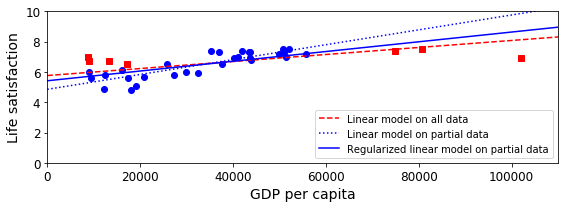

In [156]:
plt.figure(figsize=(8, 3))
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")

plt.plot(list(sample_data["GDP per capita"]), 
         list(sample_data["Life satisfaction"]), "bo")
plt.plot(list(missing_data["GDP per capita"]),
         list(missing_data["Life satisfaction"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Linear model on all data")
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")

# 加入L2 正则项
ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)

t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", 
         label="Regularized linear model on partial data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
save_fig('ridge_model_plot')
plt.show()

In [157]:
backup = oecd_bli, gdp_per_capita

def prepare_country_stats(oecd_bli, gdp_per_capita):
    return sample_data

In [158]:
# 替换以下模型
model = sklearn.linear_model.LinearRegression()

In [159]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# 训练模型
model.fit(X, y)

# 预测
X_new = np.array([[22587.0]])  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.76666667]]

[[ 5.96242338]]


### 课后习题：

1： 怎么定义机器学习   
答：机器学习是一种可以从数据从学习获得信息的系统。学习意味着给定某中测量精度的方法，可以在某些任务上表现的更好。

2：四种类型的问题  
机器学习对于复杂的问题是非常重要的，因为没有常规的解决方案。其可以代替长时间的手动调整规则，构建适应环境变动的系统，最后帮助我们学习，比如数据挖掘。


3: 标记训练集  
也是训练集，只不过其中包含了解决方案

4：两种最常见的监督学习任务  
回归和分类

5：四种常见的非监督学习任务  
聚类，降维，可视化，和关联规则学习

6： 什么类型的机器学习算法可以使机器人走在不同的路面上  
强化学习，这种问题通常是强化学习的类型。也许可以将其描述为监督或者半监督的学习问题， 但不太自然

7：使用什么类型的算法可以将顾客分成不同的组   
如果不知道怎么去定义组，可以使用聚类。  
如果知道组的类型，可以使用分类将不同顾客分组。

8： 将垃圾邮件分类作为监督还是非监督类型的任务   
典型的监督学习方法：算法使用了很多标记有垃圾或者非垃圾的邮件。

9： 什么是在线学习系统   
在线学习系统可以循序渐进的学习， 而不是批量学习。  
这使得它能够快速适应变化的数据和自调节系统，并且可以训练超大量的数据。

10：什么是out-of-core 学习(非核心)   
非核心算法可以处理大量的数据， 这些数据无法存入计算机的主存储器中。  
将数据分成小批量，并使用在线学习从这些小批量中进行学习。

11：什么样的机器学习方法依赖于相似性度量做预测     
一个基于实例的学习系统通过心脏学习训练数据;然后，在给定一个新实例时，它使用相似度度量来查找最相似的已学习实例，并使用它们进行预测。

12：机器学习模型的参数和超参数有什么区别    
机器学习模型有一个或多个参数决定的新实例的预测结果(比如线性模型的斜率)  
而机器学习算法尝试去发现这些参数的最优值，这样模型就能更好的推广到新实例。  
超参数是机器学习算法本身的参数，不是模型的参数(比如正则化量)

13：基于模型的学习算法在搜索什么？最普遍的成功的策略是什么？怎么做预测？  
为模型参数寻找一个最优值，这样模型就能很好地推广到新实例。  
通常通过最小化损失函数(成本函数)来训练这些系统， 该函数用于测量系统在训练集的糟糕程度。  如果模型是正则化的，模型复杂度就会受到惩罚。 为做出预测， 使用学习算法发现的参数值，将新实例的特征输入到模型的预测函数中。  

14：四个机器学习的主要挑战   
主要是数据缺失，数据质量差，非代表性数据，无信息的特征。  
因此过意简单的模型欠拟合，过于负责的模型过拟合。

15：如果模型在训练集上表现很好，但是难以推广到新实例，怎么回事？给出至少3种解决办法。  
说明模型过拟合。  
通常的解决办法有： 加入更多的数据进行训练，简化模型(选择简单的算法， 减少使用的参数或特性， 或者正则化模型)，较少训练集的噪声等等。  

16：什么是测试集？为什么需要使用它  
在模型正式使用之前，使用一个测试集来估计模型在新实例上生成的泛化错误。

17：验证集的目的是什么？   
验证集用于比较模型。使得选择最佳模型和调优超参数成为可能。

18： 使用测试集进行模型超参数调优会出现什么问题  
如果使用测试集进行调参，您可能会过度拟合测试集， 并且对测量的泛化误差感觉很好(
可能会得到一个比预测差很多的系统)


19：什么是交叉验证？为什么这么这么喜欢使用验证集？   
交叉验证是一种技术，它使得可以比较模型(用于模型选择和超参数优化)而不需要单独的验证集。
可以节省宝贵的训练数据。